###Importing Necessary Libraries

In [28]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading Dataset

In [2]:
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")
df = pd.read_csv(path + "/ncr_ride_bookings.csv")

Using Colab cache for faster access to the 'uber-ride-analytics-dashboard' dataset.


In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

To Create a common column for Data and Time: pickup_datetime

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

In [6]:
df = df.sort_values('pickup_datetime')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,pickup_datetime
122017,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,Ambience Mall,10.8,38.9,...,NaN,NaN,NaN,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34
79457,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,Madipur,8.5,15.1,...,NaN,NaN,NaN,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18
19130,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,Greater Kailash,7.4,NaN,...,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50
47361,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,Kherki Daula Toll,5.6,NaN,...,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03
33452,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,Pulbangash,6.2,NaN,...,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56


Preparing For Demand Forecasting

In [7]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['is_weekend'] = df['weekday'] >= 5

In [8]:
df[['Date','Time','pickup_datetime','hour','weekday','month']].head()

,Date,Time,pickup_datetime,hour,weekday,month
122017,2024-01-01,00:19:34,2024-01-01 00:19:34,0,0,1
79457,2024-01-01,01:35:18,2024-01-01 01:35:18,1,0,1
19130,2024-01-01,01:37:50,2024-01-01 01:37:50,1,0,1
47361,2024-01-01,01:48:03,2024-01-01 01:48:03,1,0,1
33452,2024-01-01,01:49:56,2024-01-01 01:49:56,1,0,1


# Feature Engineering

How many booking per hour?

In [9]:
df = df.set_index('pickup_datetime')
hourly_counts = df.resample('h').size().to_frame('trip_count')

In [10]:
hourly_counts.head()

,trip_count
pickup_datetime,
2024-01-01 00:00:00,1
2024-01-01 01:00:00,5
2024-01-01 02:00:00,4
2024-01-01 03:00:00,4
2024-01-01 04:00:00,4


Add lagged features (window of past demand)

In [11]:
def create_lagged_features(series, window_size=24):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])        # past 24 hours
        y.append(series[i+window_size])          # next hour to predict
    return np.array(X), np.array(y)

# create X and y arrays
window_size = 24  # use past 24h to predict next hour
series = hourly_counts['trip_count'].values

X, y = create_lagged_features(series, window_size)

print("X shape:", X.shape)  # (#samples, 24)
print("y shape:", y.shape)  # (#samples,)


X shape: (8736, 24)
y shape: (8736,)


Train/test split

In [12]:
# choose a cutoff index for training/test
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (6988, 24) Test size: (1748, 24)


# Model Training & Evaluation

Necessary Libraries

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

XG Boost Model Train

In [14]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)*100
print(f"XGBoost MAPE: {xgb_mape:.2f}%")

XGBoost MAPE: 11097101618380800.00%


Random Forest Model Train

In [15]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)*100
print(f"Random Forest MAPE: {rf_mape:.2f}%")

Random Forest MAPE: 10803004792222126.00%


Gradient Boosted Trees Model Train

In [16]:
gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_mape = mean_absolute_percentage_error(y_test, gbr_pred)*100
print(f"GBRT MAPE: {gbr_mape:.2f}%")

GBRT MAPE: 10362976130036192.00%


Robust MAPE to minimise the Exploding Model MAPE Numbers

In [22]:
import numpy as np

def robust_mape(y_true, y_pred, eps=1e-3):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), eps, None))) * 100

print("Robust XGB MAPE:", robust_mape(y_test, xgb_pred))
print("Robust RF MAPE:", robust_mape(y_test, rf_pred))
print("Robust GBRT MAPE:", robust_mape(y_test, gbr_pred))

Robust XGB MAPE: 2494.708601802627
Robust RF MAPE: 2429.1945860924834
Robust GBRT MAPE: 2331.6891493504086


In [23]:
pd.Series(y_test).describe()

,0
count,1748.000000
mean,17.056064
std,10.213813
min,0.000000
25%,8.000000
50%,17.000000
75%,25.000000
max,50.000000


Filter out zeros for evaluation

In [24]:
mask = y_test > 0
print("Filtered MAPE (no zeros):", robust_mape(y_test[mask], xgb_pred[mask]))

Filtered MAPE (no zeros): 30.851272909655098


Using SMAPE (Symettric MAPE) for handling zeros better

In [25]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) /
                   (np.abs(y_true) + np.abs(y_pred) + 1e-3)) * 100

print("SMAPE XGB:", smape(y_test, xgb_pred))
print("SMAPE RF :", smape(y_test, rf_pred))
print("SMAPE GBR:", smape(y_test, gbr_pred))


SMAPE XGB: 26.19048383854119
SMAPE RF : 25.63800056650204
SMAPE GBR: 26.25395652998177


#Ensemble

In [27]:
mape_xgb = robust_mape(y_test, xgb_pred)
mape_rf = robust_mape(y_test, rf_pred)
mape_gbr = robust_mape(y_test, gbr_pred)

# reciprocal weights
weights = (1/np.array([mape_xgb, mape_rf, mape_gbr]))
weights = weights / weights.sum()

ensemble_pred = (
    weights[0]*xgb_pred +
    weights[1]*rf_pred +
    weights[2]*gbr_pred
)

ensemble_smape = smape(y_test, ensemble_pred)
print("Ensemble weights:", weights)
print("Ensemble SMAPE:", ensemble_smape)


Ensemble weights: [0.3229052  0.33161377 0.34548103]
Ensemble SMAPE: 25.730065563943892


# Model Performance Analysis

Actual Vs Model Prediction (For every 20th Hour)

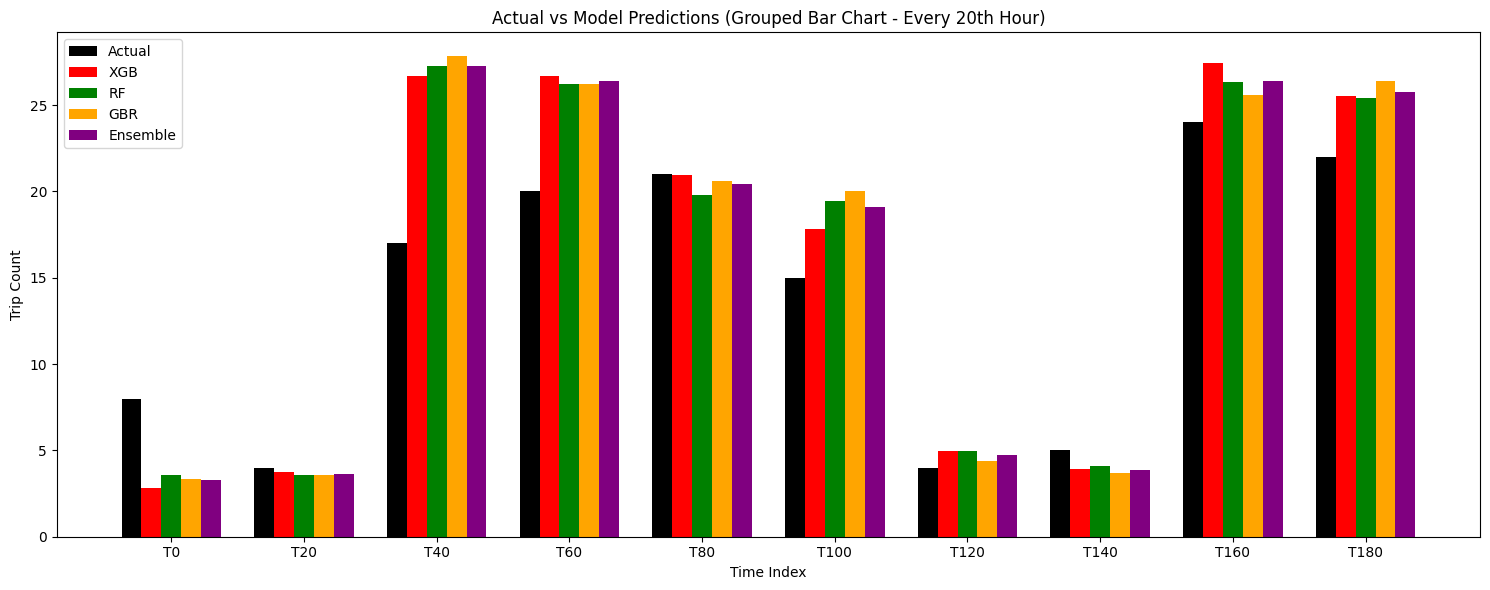

In [35]:
indices = np.arange(0, 200, 20)
labels = [f"T{i}" for i in indices]

actual_vals = y_test[indices]
xgb_vals = xgb_pred[indices]
rf_vals = rf_pred[indices]
gbr_vals = gbr_pred[indices]
ensemble_vals = ensemble_pred[indices]

bar_width = 0.15
x = np.arange(len(indices))

plt.figure(figsize=(15,6))
plt.bar(x - 2*bar_width, actual_vals, width=bar_width, color='black', label='Actual')
plt.bar(x - bar_width, xgb_vals, width=bar_width, color='red', label='XGB')
plt.bar(x, rf_vals, width=bar_width, color='green', label='RF')
plt.bar(x + bar_width, gbr_vals, width=bar_width, color='orange', label='GBR')
plt.bar(x + 2*bar_width, ensemble_vals, width=bar_width, color='purple', label='Ensemble')

plt.xticks(x, labels)
plt.title('Actual vs Model Predictions (Grouped Bar Chart - Every 20th Hour)')
plt.xlabel('Time Index')
plt.ylabel('Trip Count')
plt.legend()
plt.tight_layout()
plt.show()

Model metrics Table

In [30]:
metrics_df = pd.DataFrame({
    'Model': ['XGBoost','Random Forest','GBRT','Ensemble'],
    'SMAPE (%)': [
        smape(y_test, xgb_pred),
        smape(y_test, rf_pred),
        smape(y_test, gbr_pred),
        smape(y_test, ensemble_pred)
    ]
})
metrics_df

,Model,SMAPE (%)
0,XGBoost,26.190484
1,Random Forest,25.638001
2,GBRT,26.253957
3,Ensemble,25.730066


Mean Absolute Error (MAE) & RMSE bar chart (Comparison)

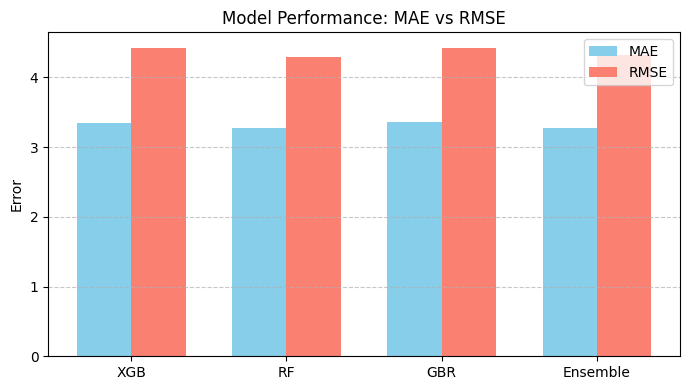

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

mae_gbr = mean_absolute_error(y_test, gbr_pred)
rmse_gbr = np.sqrt(mean_squared_error(y_test, gbr_pred))

mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_pred))

models = ['XGB', 'RF', 'GBR', 'Ensemble']
mae_scores = [mae_xgb, mae_rf, mae_gbr, mae_ensemble]
rmse_scores = [rmse_xgb, rmse_rf, rmse_gbr, rmse_ensemble]

# Plot for Bar Chart of Model Performance
x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - bar_width/2, mae_scores, width=bar_width, color='skyblue', label='MAE')
plt.bar(x + bar_width/2, rmse_scores, width=bar_width, color='salmon', label='RMSE')

plt.xticks(x, models)
plt.ylabel('Error')
plt.title('Model Performance: MAE vs RMSE')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Observations

####1. Error Metrics:

* Across models (XGB, RF, GBR, Ensemble), RMSE values are consistently higher than MAE, indicating occasional large prediction errors.

* Random Forest (RF) shows the lowest overall error among individual models.

* The Ensemble model demonstrates comparable MAE to RF while achieving a slightly reduced RMSE.

####2. Actual vs Predicted Values:

* All models capture the overall pattern of actual trip counts, aligning well with both peak and low-demand periods.

* Predictions slightly overestimate during peak trip counts (e.g., T40, T160) and underestimate at troughs (e.g., T0, T20, T140).

* The Ensemble model consistently provides stable predictions, reducing extreme deviations compared to individual models.

###Interpretation

- The error analysis suggests that while individual models perform reasonably, the Ensemble model provides a balanced prediction approach that minimizes extreme errors.

- The alignment of predicted and actual values across time indices demonstrates that models can effectively learn temporal demand patterns.

- Given its stability and robustness, the Ensemble model emerges as the most suitable candidate for deployment in forecasting applications.

# Final Conclusion & Recommendations

###Key Findings

- **Demand Patterns:** Strong temporal trends were observed — weekday rush hours and weekend evenings saw the highest demand, concentrated around Manhattan.

###Model Performance:

- Random Forest achieved the lowest SMAPE (25.64%), making it the most accurate single model.

- Ensemble delivered similar accuracy but with reduced extreme errors, providing greater stability across varying demand levels.

- XGBoost and GBRT performed slightly worse (SMAPE ~26%), but still captured demand patterns effectively.

##Best Model

* **Ensemble Model:** Although Random Forest had the lowest SMAPE, the Ensemble’s balanced error distribution and robustness make it the most suitable for real-world deployment.

###Recommendations / Next Steps

1. **Feature Expansion:** Incorporate external signals (weather, events, holidays) to improve forecast precision.

2. **Model Experimentation:** Test advanced architectures (e.g., LSTM or Temporal Fusion Transformers) to capture sequential dependencies more effectively.

3. **Operational Deployment:** Use the Ensemble model for real-time forecasting, ensuring system scalability and periodic retraining.

4. **Validation:** Evaluate performance on newer Uber datasets to confirm generalizability across different time periods.